## Imports

In [1]:
import util

import convokit
from convokit import Corpus
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline

## Corpus variables setup

In [119]:
# corpus variable -> get from saved path
data_path_remote = '/nethome/dkwon49/.convokit/saved-corpora/subreddit-travel-len-del-rem'
corpus = Corpus(data_path_remote)

In [3]:
# lambda filtering functions
filter_func = lambda utt: utt.speaker.id + ": " + utt.text
integrity_func = lambda conv: conv.check_integrity(verbose=False)

In [95]:
# filter out non-complete conversations. this can be done using the check_integrity function.
# NOTE: THIS HAS ALREADY BEEN RUN
corpus.filter_conversations_by(integrity_func)

In [4]:
# get conversation lengths
conv_lengths = util.get_conv_lengths(corpus)

## General statistics

In [5]:
reload(util)

<module 'util' from '/home/dkwon49/reddit-summarization/data/util.py'>

In [6]:
# some stats
print("original corpus")
mean, std = util.mean_std(conv_lengths)
print("mean: {}, std: {}".format(mean, std))
corpus.print_summary_stats()

original corpus
mean: 2.640203393670379, std: 4.401356646346785
Number of Speakers: 235966
Number of Utterances: 1258614
Number of Conversations: 476711


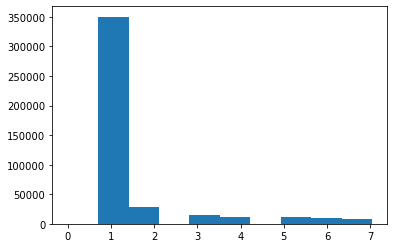

In [10]:
# plot historgram
util.plot_conv_lengths_histogram(conv_lengths, low=0, high=mean+std, bins=10)

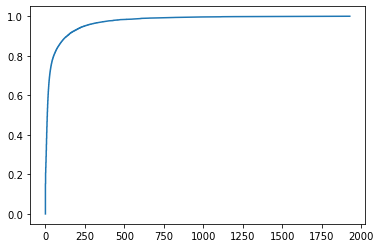

In [49]:
# get a cdf of the conv length distribution
util.plot_conv_lengths_cdf(conv_lengths)

In [9]:
# number of total [deleted] utterances
print(util.num_deleted_utterances(corpus))

140680


In [56]:
# number of [deleted] conversations
deleted_conv_count, deleted_conv_lengths = util.num_deleted_convs(corpus)
print(deleted_conv_count)

87503


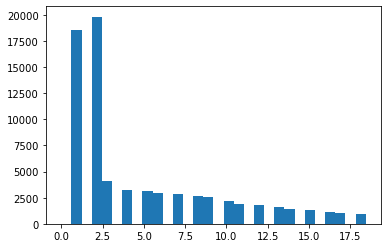

In [60]:
# plot histogram for deleted conv lengths
deleted_mean, deleted_std = util.mean_std(conv_lengths)
util.plot_conv_lengths_histogram(deleted_conv_lengths, low=0, high=deleted_mean+deleted_std)

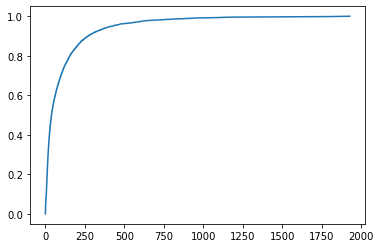

In [58]:
# we see that the deleted conversaton lengths are pretty similarly
# distributed as regular lengths, so we shoudl be able to omit these
# lengths from the corpus
util.plot_conv_lengths_cdf(deleted_conv_lengths)

In [53]:
# number of root [deleted] utterances
deleted_root_utt, indexes = util.num_deleted_root_utterances(corpus)
print(deleted_root_utt)

28571


In [28]:
# find the mean length of conversations with root [deleted] utterances

count = 0
for i in range(len(indexes)):
    count += conv_lengths[indexes[i]]

count /= len(indexes)
print(count)

3.270729060935914


In [31]:
# number of conversations with length 1 that are deleted

def len_1_conv_deleted(corpus):
    count = 0
    for conv in corpus.iter_conversations():
        if len(conv.get_utterance_ids()) == 1:
            for utt in conv.iter_utterances():
                if utt.text == "[deleted]":
                    count += 1
    return count

print(len_1_conv_deleted(corpus))

18535


In [29]:
# number of conversations with length 1
print(util.num_convs_between(conv_lengths, 1, 1))

407992


## Conversation '[deleted]'/'[removed]'filtering

In [114]:
# Filter out of this corpus all conversations with a "[deleted]" utterance
def deleted_filter_func(conv):
    '''
    The lambda function used to filter the corpus. We will return
    False if the conversation has a '[deleted]' utterance, True
    otherwise
    '''
    for utt in conv.iter_utterances():
        if utt.text == '[deleted]' or utt.text == '[removed]':
            return False
    
    return True

In [115]:
# filter / augment the corpus
corpus.filter_conversations_by(deleted_filter_func)

In [116]:
# save this version of the corpus
deleted_corpus_name = "subreddit-travel-del-rem"
corpus.dump(deleted_corpus_name)

In [92]:
reload(util)

<module 'util' from '/home/dkwon49/reddit-summarization/data/util.py'>

In [117]:
conv_lengths = util.get_conv_lengths(corpus)

In [118]:
# some stats
print("deleted corpus")
mean, std = util.mean_std(conv_lengths)
print("mean: {}, std: {}".format(mean, std))
corpus.print_summary_stats()

deleted corpus
mean: 2.640203393670379, std: 4.401356646346785
Number of Speakers: 235966
Number of Utterances: 1258614
Number of Conversations: 476711


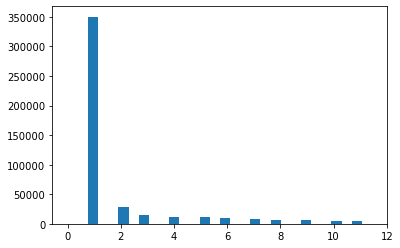

In [122]:
# plot historgram
util.plot_conv_lengths_histogram(conv_lengths, low=0, high=mean+2*std)

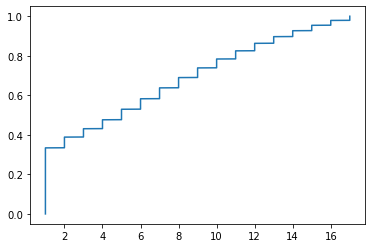

In [123]:
# get a cdf of the conv length distribution
util.plot_conv_lengths_cdf(conv_lengths, low=0, high=17)

In [119]:
# number of conversations between length x and y
print(util.num_convs_between(conv_lengths, 4, 7))

40558


In [91]:
util.print_conversation_complete(corpus.random_conversation())

travelhot: 


In [121]:
print(util.num_removed_convs(corpus)[0])
print(util.num_deleted_convs(corpus)[0])

0
0


## Conversation length filtering Pt. 1

In [78]:
# Filter out of this corpus all conversations <= 2 utterance's
def length_filter_func(conv):
    '''
    The lambda function used to filter this corpus for
    conversations that are too short. Returns False if
    the conversation has <= 2 utterances, True otherwise
    '''
    return len(conv.get_utterance_ids()) > 2

In [12]:
# filter / augment the corpus
corpus.filter_conversations_by(length_filter_func)

In [90]:
conv_lengths = util.get_conv_lengths(corpus)

In [14]:
# some stats
print("trimmed corpus")
mean, std = util.mean_std(conv_lengths)
print("mean: {}, std: {}".format(mean, std))
corpus.print_summary_stats()

trimmed corpus
mean: 8.702629749294507, std: 6.921846535873264
Number of Speakers: 126140
Number of Utterances: 851152
Number of Conversations: 97804


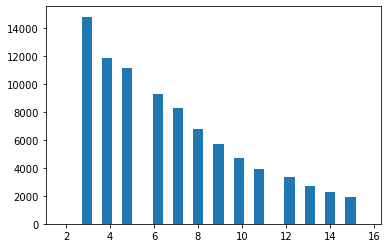

In [15]:
# plot historgram
util.plot_conv_lengths_histogram(conv_lengths, low=mean-std, high=mean+std)

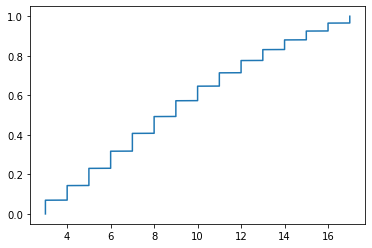

In [16]:
# get a cdf of the conv length distribution
util.plot_conv_lengths_cdf(conv_lengths, low=0, high=17)

In [52]:
reload(util)

<module 'util' from '/home/dkwon49/reddit-summarization/data/util.py'>

In [91]:
print(util.num_convs_between(conv_lengths, 7,7))

8257


In [31]:
# save this version of the corpus
# deleted_corpus_name = "subreddit-travel-len-del-rem"
# corpus.dump(deleted_corpus_name)

## Uterance word length statistics

In [124]:
# Data for length 4 conversations
conv_length = 4
utt_avg = util.get_conv_utt_lengths_avg(corpus, 4)

In [125]:
utt_avg_mean, utt_avg_std = util.mean_std(utt_avg)

In [126]:
print("""average utterance lengths for conversations with length {}:
mean: {}
std: {}""".format(conv_length, utt_avg_mean, utt_avg_std))

average utterance lengths for conversations with length 4:
mean: 59.00466087396659
std: 50.24584452907781


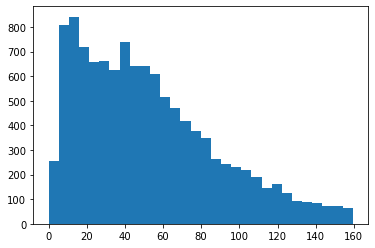

In [127]:
util.plot_conv_lengths_histogram(utt_avg, low=0, high=utt_avg_mean+2*utt_avg_std)

In [141]:
# Data for length 5 conversations
conv_length = 5
utt_avg = util.get_conv_utt_lengths_avg(corpus, 5)

In [142]:
utt_avg_mean, utt_avg_std = util.mean_std(utt_avg)

In [143]:
print("""average utterance lengths for conversations with length {}:
mean: {}
std: {}""".format(conv_length, utt_avg_mean, utt_avg_std))

average utterance lengths for conversations with length 5:
mean: 59.63959527220643
std: 45.431229605582686


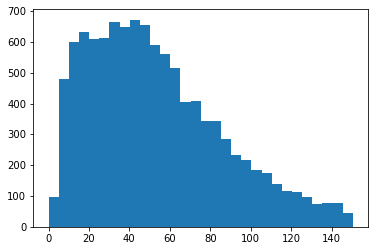

In [144]:
util.plot_conv_lengths_histogram(utt_avg, low=0, high=utt_avg_mean+2*utt_avg_std)

In [145]:
# Data for length 6 conversations
conv_length = 6
utt_avg = util.get_conv_utt_lengths_avg(corpus, 6)

In [146]:
utt_avg_mean, utt_avg_std = util.mean_std(utt_avg)

In [147]:
print("""average utterance lengths for conversations with length {}:
mean: {}
std: {}""".format(conv_length, utt_avg_mean, utt_avg_std))

average utterance lengths for conversations with length 6:
mean: 60.30455868089241
std: 42.40178525915971


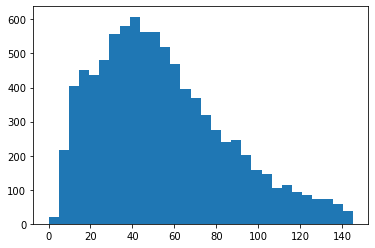

In [148]:
util.plot_conv_lengths_histogram(utt_avg, low=0, high=utt_avg_mean+2*utt_avg_std)

In [149]:
# Data for length 7 conversations
conv_length = 7
utt_avg = util.get_conv_utt_lengths_avg(corpus, 7)

In [150]:
utt_avg_mean, utt_avg_std = util.mean_std(utt_avg)

In [151]:
print("""average utterance lengths for conversations with length {}:
mean: {}
std: {}""".format(conv_length, utt_avg_mean, utt_avg_std))

average utterance lengths for conversations with length 7:
mean: 61.324036748040655
std: 42.41514864657423


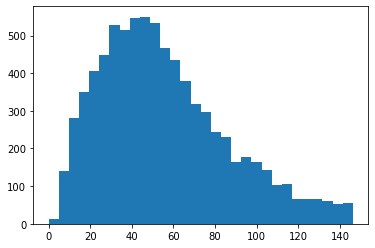

In [152]:
util.plot_conv_lengths_histogram(utt_avg, low=0, high=utt_avg_mean+2*utt_avg_std)

## Data cleaning corpus mutation

In [118]:
reload(util)

<module 'util' from '/home/dkwon49/reddit-summarization/data/util.py'>

In [120]:
util.execute_regex(corpus)

In [123]:
# saved the cleansed corpus
new_corpus_name = "subreddit-travel-clean-len-del-rem"
corpus.dump(new_corpus_name)

## Conversation length filtering Pt. 2

In [79]:
# Filter out of this corpus all conversations 4<=N<=6 utterance's
def length_filter_func_2(conv):
    '''
    The lambda function used to filter this corpus for
    conversations. Returns True if the conversation has
    4 <= N <= 6 utterances, and False otherwise
    '''
    return len(conv.get_utterance_ids()) >= 4 and len(conv.get_utterance_ids()) <= 6

In [80]:
# filter / augment the corpus
corpus.filter_conversations_by(length_filter_func_2)

In [81]:
conv_lengths = util.get_conv_lengths(corpus)

In [82]:
# some stats
print("trimmed corpus")
mean, std = util.mean_std(conv_lengths)
print("mean: {}, std: {}".format(mean, std))
corpus.print_summary_stats()

trimmed corpus
mean: 4.920281105848116, std: 0.804920547787056
Number of Speakers: 47559
Number of Utterances: 158930
Number of Conversations: 32301


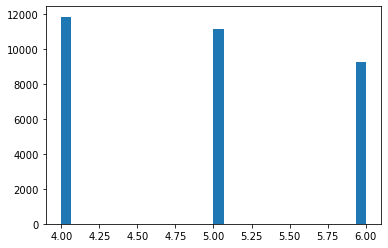

In [84]:
# plot historgram
util.plot_conv_lengths_histogram(conv_lengths, low=4, high=6)

## Conversation printing/formatting

In [35]:
import random

In [43]:
# get random conversation from corpus
rand_conv = corpus.random_conversation()

In [28]:
# function for formatting
filter_func = lambda utt: utt.speaker.id + ": " + utt.text

In [121]:
convs = util.get_convs_with_length(corpus, 4)

In [122]:
rand_conv = random.choice(convs)
print("*** UNFILTERED ***")
rand_conv.print_conversation_structure(utt_info_func=filter_func)
print("*** FILTERED ***")
util.print_conversation_complete(rand_conv)

*** UNFILTERED ***
[deleted]: I have a question regarding the feasibility of this scenario:. I'm arriving in Bangkok from Siem Reap at 10:50PM at Dong Mueang Airport, and the train supposedly departs from DMK at 10:49 for Chiangmai. The original plan was to go back to Bangkok for the night and grabbing the morning train, but I'd figure if I could somehow make it, I would save a night AND get there earlier. How late are trains in Bangkok, typically? I know it is notorious for being late, but what would you say the odds are of me landing on time, checking out, and buying a train ticket compared to the odds of the train being 20-30 minutes late?. 
    Jess7286: I would not risk something like that, but that's just me. You could take the first bus from BKK to Chiang Mai. It's 11 hours, leaving from Mo Chit station at 5:40am.   . The nice thing about the buses is that you don't have to show up in advance to buy tickets and they are usually the same, if not faster, than the trains. 
    Reco

In [30]:
filter_func = lambda utt: utt.speaker.id + ": " + utt.text